In [2]:
%load_ext autoreload
%autoreload 2
import yaml
import pandas as pd
# from pandas.core.common import SettingWithCopyWarning
pd.options.mode.chained_assignment = None
# import warnings
# warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
import numpy as np
import os
opj = os.path.join
opd = os.path.dirname
import glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from utils import *
from analyse import *

Z = norm.ppf

In [7]:
out='sub-004_ses-1_task-contrastL_run-3'
out='sub-004_ses-1_task-contrastH_run-2'

sub=out.split('_')[0]
tsk=out.split('_')[2].split('-')[-1][:-1]
attn=out.split('_')[2][-1].lower()
name='exp'
""
beh = AnalyseRun(out, tsk, attn,sub,name)
# beh.analyse2afc()
beh.analyseYesNo()

Settings file:  /data1/projects/dumoulinlab/Lab_members/Sumiya/programs/pRF_attention_task/Experiment/expsettings/expsettings_yesnoH.yml

Attention H
Proportions: [0.375, 0.625]
Response Keys: ['nan' 'b']

small D': 1.633, C: 1.382

21 expected responses                        
9 actual subject responses                        
6 hits (within 1s)                        
15 misses                        
3 false alarms                        
Average RT: 0.736s



In [29]:
summary=dd(dict)

summary
summary['cond'],summary['prop'],summary

'sub-004_ses-1_task-contrastH_run-2'

In [58]:
# summary
fnames=sorted([f for f in os.listdir(opj(beh.wd,'logs',sub)) if tsk in f ])
fnames

['sub-004_ses-1_task-contrastH_run-11_Logs',
 'sub-004_ses-1_task-contrastH_run-2_Logs',
 'sub-004_ses-1_task-contrastH_run-5_Logs',
 'sub-004_ses-1_task-contrastH_run-8_Logs',
 'sub-004_ses-1_task-contrastL_run-10_Logs',
 'sub-004_ses-1_task-contrastL_run-12_Logs',
 'sub-004_ses-1_task-contrastL_run-13_Logs',
 'sub-004_ses-1_task-contrastL_run-1_Logs',
 'sub-004_ses-1_task-contrastL_run-3_Logs',
 'sub-004_ses-1_task-contrastL_run-4_Logs',
 'sub-004_ses-1_task-contrastL_run-6_Logs',
 'sub-004_ses-1_task-contrastL_run-7_Logs',
 'sub-004_ses-1_task-contrastL_run-9_Logs']

sub-004_ses-1_task-contrastH_run-5_Logs
sub-004_ses-1_task-contrastL_run-12_Logs
sub-004_ses-1_task-contrastL_run-6_Logs
sub-004_ses-1_task-contrastL_run-3_Logs
sub-004_ses-1_task-contrastL_run-13_Logs
sub-004_ses-1_task-contrastL_run-7_Logs
sub-004_ses-1_task-contrastH_run-8_Logs
sub-004_ses-1_task-contrastL_run-1_Logs
sub-004_ses-1_task-contrastL_run-9_Logs
sub-004_ses-1_task-contrastH_run-14_Logs
sub-004_ses-1_task-contrastH_run-2_Logs
sub-004_ses-1_task-contrastH_run-11_Logs
sub-004_ses-1_task-contrastL_run-10_Logs
sub-004_ses-1_task-contrastL_run-4_Logs


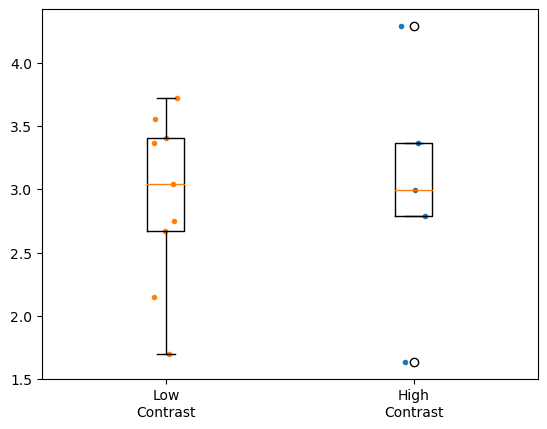

In [61]:
sub='sub-004'
n='exp'
substr=''#'ses-3_task-yesno'
if (substr == '') & (n == 'train'):
    substr='ses-0_task-yesno'
elif substr == '':
    substr='ses-1_task-contrast'
r=None
excl=['run-15']

pth=opj(os.getcwd(),'logs',sub)
fn=os.listdir(pth)#os.listdir(opj(os.environ['DIR_DATA_HOME'],f'sourcedata/{sub}/ses-1/prf/'))
fn=[f for f in fn if substr in f]
dL=[]
dS=[]

for f in fn:
    if any([ex in f for ex in excl]):
        continue 
    print(f)
    out=f[:-5]
    tsk=out.split('_')[2].split('-')[-1][:-1]
    attn=out.split('_')[2][-1].lower()
    name=n
    beh = AnalyseRun(out, tsk, attn,sub,name,verbose=False)
    beh.analyseYesNo(resp=r)
    if attn == 'l': 
        dL.append(beh.d)
    else:
        dS.append(beh.d)

plt.boxplot([dL,dS])
plt.scatter(np.random.uniform(1.95,2.05,len(dS)),dS,marker='.')
plt.scatter(np.random.uniform(0.95,1.05,len(dL)),dL,marker='.')
plt.xticks([2,1],['High\nContrast','Low\nContrast'])
plt.show()
